# THIS NOTEBOOK IS FOR REFERENCE ONLY, DON'T EDIT HERE

In [1]:
# importing libraries for data processing
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from PIL import Image
from skimage import exposure

In [2]:
#Taking npy inputs, change folders name based on your setup

imgtype="processed" #processed or resized or unprocessed, edit here
path_npy="source_data/npy"#path to npy folder

X_benign=np.load(os.path.join(path_npy,f"{imgtype}_train_benign.npy"))
X_malignant=np.load(os.path.join(path_npy,f"{imgtype}_train_malignant.npy"))

X_benign_test=np.load(os.path.join(path_npy,f"{imgtype}_test_benign.npy"))
X_malignant_test=np.load(os.path.join(path_npy,f"{imgtype}_test_malignant.npy"))

y_benign = np.zeros(X_benign.shape[0])
y_malignant = np.ones(X_malignant.shape[0])

y_benign_test = np.zeros(X_benign_test.shape[0])
y_malignant_test = np.ones(X_malignant_test.shape[0])

X_train = np.concatenate((X_benign, X_malignant), axis = 0)
y_train = np.concatenate((y_benign, y_malignant), axis = 0)

X_test = np.concatenate((X_benign_test, X_malignant_test), axis = 0)
y_test = np.concatenate((y_benign_test, y_malignant_test), axis = 0)

# Shuffle data
s = np.arange(X_train.shape[0])
np.random.shuffle(s)
X_train = X_train[s]
y_train = y_train[s].reshape(-1, 1)

s = np.arange(X_test.shape[0])
np.random.shuffle(s)
X_test = X_test[s]
y_test = y_test[s].reshape(-1, 1)



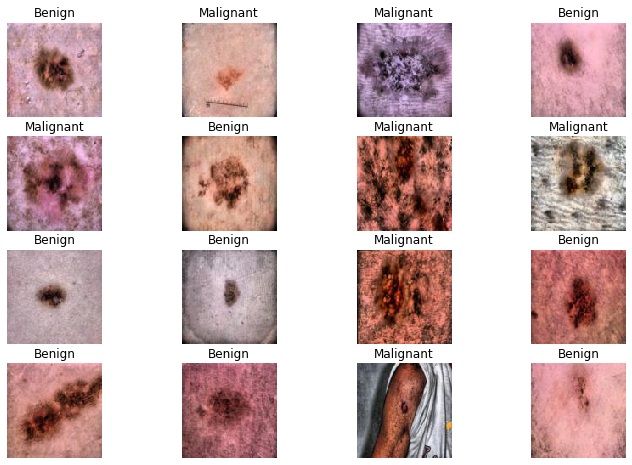

In [3]:
# display few images
w=40
h=30
fig1=plt.figure(figsize=(12, 8))
rows = 4
columns=4
for i in range(1, columns*rows+1, 1):
    ax = fig1.add_subplot(rows, columns, i)
    if y_train[-1*i] == 0:
        ax.title.set_text('Benign')
    else:
        ax.title.set_text('Malignant')
    plt.imshow(X_train[-1*i], interpolation='nearest')
    plt.axis('off')
plt.show()



In [4]:
# making use of sklearn instead of keras for one hot encoding
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()
y_train = encoder.fit_transform(y_train.reshape(-1,1)).toarray()
y_test = encoder.transform(y_test.reshape(-1,1)).toarray()


In [5]:
# normalization of predictors
X_train = X_train/255.
X_test = X_test/255.